<a href="https://colab.research.google.com/github/pabanib/CEFIM-Informes/blob/main/PresupMendoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

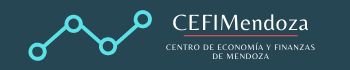

<font color="lightblue"><font size = "10"> Presupuesto de Mendoza</font>



# <font color="lightblue"> Introducción </font>

El presupuesto provincial es el principal instrumento de política económica que tiene la provincia de Mendoza para planificar y gestionar sus recursos. A través de él, se establecen las prioridades de gasto y se asignan los fondos necesarios para el desarrollo de políticas públicas, infraestructura, educación, salud y otros servicios esenciales. En este sentido, el presupuesto no solo refleja las decisiones económicas del gobierno provincial, sino que también actúa como un indicador de la dirección en la que se moverá la economía local.

El seguimiento de la ejecución presupuestaria es crucial para evaluar la eficacia y eficiencia de la gestión gubernamental. Mediante un análisis detallado de la ejecución del presupuesto, es posible identificar áreas de mejora, prever posibles desajustes y tomar decisiones informadas para corregir el rumbo económico de la provincia. En un contexto de incertidumbre económica, como el actual, la capacidad de adaptarse rápidamente a los cambios es fundamental para mantener la estabilidad financiera y promover el crecimiento sostenible.

En este reporte, se presenta un análisis  de la información presupuestaria de la provincia de Mendoza. Utilizando la plataforma Colab, se ofrece un entorno colaborativo y dinámico que permite actualizar la información en tiempo real, a medida que se disponen de nuevos datos gubernamentales. Esta herramienta no solo facilita el acceso a datos actualizados, sino que también permite a los usuarios adaptar el análisis a sus necesidades específicas, brindando una experiencia personalizada y enriquecedora.

En el presente análisis, hemos seleccionado áreas específicas de interés, lo cual no implica que sean las únicas disponibles para el usuario, ya que se cuenta con la información presupuestaria completa tal como la presenta la provincia.

In [1]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

nota_pie = "Fuente: elaborado por CEFIM en base a datos de la Tesorería de Mendoza"

def exporta_excel(df,nombre):
  from google.colab import files
  df.to_excel(nombre+'.xlsx')
  files.download(nombre+'.xlsx')

El reporte se basa en los datos de la ejecución presupuestaria de Mendoza. La fuente principal de datos corresponde a los movimientos del Tesoro para el año en curso, disponibles en el siguiente enlace: https://www.mendoza.gov.ar/tesoreria/movimientos-del-tesoro/. Para los períodos cerrados, se utiliza la información proveniente de la contaduría de la provincia, que puede consultarse en el siguiente enlace: https://www.mendoza.gov.ar/hacienda/ejecuciones-presupuestarias/.

Las partidas presupuestarias son extraídas de la ejecución presupuestaria y definen cada uno de los conceptos que integran el presupuesto, tanto en términos de recursos como de gastos.

In [2]:
# @title
ep = pd.read_csv("https://raw.githubusercontent.com/pabanib/dataframes/master/presupuesto/presupuesto_mza.csv", sep=';')
partidas = partidas = ep[['codipart','detapart']].groupby('codipart').first()
partidas

,detapart
codipart,
1,Recursos Corrientes
2,De Origen Provincial
3,Tributarios
4,Ingresos Brutos
5,Automotor
6,Inmobiliario
7,Sellos y Tasas de Justicia
8,Otros Tributarios
9,No Tributarios


Los datos son presentados en una base de datos que se presenta con las siguientes columnas:

- **peri** : representa el año en que se a ejecutado el presupuesto
- **mes** : representa el mes en el cual se a ejecutado el presupuesto
- **codipart** : es el código de partida que le hemos asignado para mejor manejo de las mismas.
- **detapart** : describe el nombre que tiene la partida de recurso o gasto.
- **importe** : es el monto ejecutado en la partida para el periodo y mes a valores históricos.
- **mza** : es el índice de inflación (IPC) de la provincia de Mendoza calculado por INDEC.
- **naci**: es el índice de inflación (IPC) de la nación calculada por INDEC.
- **importe_hoy** : es el monto ejecutado de la partida para el periodo y mes a valores corrientes del último periodo que tiene la base de datos.

In [3]:
# @title
ep.head()

,peri,mes,codipart,detapart,importe,mza,naci,importe_hoy
0,2007,1,55,Resultado Operativo - Amortizacion de la D Con...,59.04,0.279037,0.279037,14323.84
1,2007,1,54,Amortizacion de la Deuda Consolidada,17.89,0.279037,0.279037,4340.34
2,2007,1,53,IX. Resultado Operativo (VIII-IX),76.93,0.279037,0.279037,18664.18
3,2007,1,52,VIII. Egresos Totales (II+V+VI+VII),199.06,0.279037,0.279037,48294.44
4,2007,1,51,VII. Ingresos Totales (I+IV),275.99,0.279037,0.279037,66958.61


In [4]:
#exporta_excel(ep, 'presupuesto.xlsx')

In [5]:
# @title
ep2 = ep.groupby(['peri','mes','detapart']).first()
presup_prov = ep2.importe_hoy.unstack()[[partidas.iloc[1].values[0],partidas.iloc[13].values[0],partidas.loc[20].values[0], partidas.loc[21].values[0], partidas.loc[25].values[0], partidas.loc[54].values[0],partidas.loc[43].values[0]]]
for c in presup_prov.columns:
  presup_prov[c] = presup_prov[c].apply(lambda x: float(str(x).replace(',','.')))
presup_prov

ini = str(int(presup_prov.index[0][0]))+'-'+str(int(presup_prov.index[0][1]))
fin = str(int(presup_prov.index[-1][0]))+'-'+str(int(presup_prov.index[-1][1]))
peri = (pd.period_range(ini,fin,freq = 'm'))

presup_prov.index = peri.to_timestamp()

In [6]:
#exporta_excel(presup_prov, 'Presupuesto provincia.xlsx')

# <font color="lightblue"> Recursos </font>

En esta sección, realizaremos un reporte sobre la evolución de los recursos provinciales. Estos recursos se dividen en dos grandes grupos: los recursos que la provincia obtiene a través de su propia potestad para cobrar impuestos (recursos de origen provincial) y los recursos que la provincia recibe de la Nación, ya sea por coparticipación federal de impuestos o por transferencias realizadas por otros motivos.




## <font color="lightblue"> Evolución de los recursos
 </font>  

En el gráfico de abajo se representa la evolución de los recursos corrientes en las dos categorías mencionadas. Los importes se ajustan a valores actuales para evitar el efecto de la inflación. La frecuencia es mensual, pero para mitigar los efectos estacionales, se utiliza como medida la media móvil.

Media Móvil
La media móvil es un estadístico que calcula el promedio de los t periodos anteriores. Cuanto mayor sea el parámetro t, mayor será la influencia de los periodos antiguos en el índice.

Para entenderlo mejor, veamos un ejemplo: supongamos que tenemos una variable que ha tenido el siguiente comportamiento en los últimos 5 años:

2020: 10
2021: 15
2022: 20
2023: 15
2024: 7
Ahora queremos calcular la media móvil de tres periodos, es decir, t = 3. A partir del periodo 2022, los cálculos serían los siguientes:

2022: 15
2023: 16.67
2024: 14
En este ejemplo, se puede observar el efecto de la media móvil. En 2022, que es el periodo más alto, el valor no es tan elevado, debido a la influencia de los periodos anteriores más bajos, incluyendo el 2020. En 2023, la media móvil aumenta a pesar de la caída en la variable real, y en 2024, la fuerte caída no se refleja tan intensamente, ya que la media móvil compensa con los valores de los periodos anteriores.

Importancia de los Recursos
La recaudación de la provincia es fundamental para poder afrontar los gastos presupuestarios. Sin embargo, al depender principalmente de los ingresos de los ciudadanos, también es un buen indicador de la actividad económica. Por ello, el análisis de su comportamiento nos proporciona una indicación rápida de cómo está la situación económica.

Los recursos de origen provincial, en su mayoría, provienen del impuesto a los ingresos brutos, por lo que reflejan el comportamiento de la economía provincial en el periodo analizado.

Por otro lado, los recursos de origen nacional están compuestos principalmente por la coparticipación federal de impuestos, lo que indica cómo se maneja la economía nacional.

<font color="lightgreen">El usuario puede optar por cambiar la frecuencia de la media móvil modificando el parámetro t, ubicado en el recuadro de abajo.<font>

In [7]:
t = 12

In [8]:
# @title

fig = px.line(presup_prov[['De Origen Provincial','De Origen Nacional']].rolling(t).mean(), title = "Recursos provinciales. Media móvil {}M a valores hoy".format(t))

fig.update_layout(annotations=[dict(x=0, y=-0.2, xref='paper', yref='paper', text=nota_pie, showarrow=False)])

##  <font color="lightblue"> Comparación de recaudación con el promedio
 </font>  

La recaudación mensual esta influenciada por la estacionalidad del mes. Hay meses que por lo general son de mayor recaudación. Para eliminar este efecto se puede considerar estadísticas por mes y contemplar como viene el año en ese caso.

La estacionalidad también puede estar afectada al año entero, hacer comparaciones con el ejercicio anterior a veces puede llevar a conclusiones erroneas ya que ese periodo de comparación puede ser muy bueno o muy malo. Para un mejor análisis de ese efecto en esta sección comparamos con el promedio de recaudación para cada mes.


El reporte le permite al usuario el periodo desde el cual desea calcular el promedio, para eso debe modificar el parámetro "peri_ini". Por defecto el reporte lo calcula desde el 2016

In [9]:
peri_ini = '2016'

In [10]:
# @title

peri_act = presup_prov.index[-1].year
peri_fin = str(peri_act-1)
peri_act = str(peri_act)

rec_prom = presup_prov[['De Origen Provincial','De Origen Nacional']].loc[peri_ini:peri_fin].groupby(presup_prov.loc[peri_ini:peri_fin].index.month).mean()
presup_act  = presup_prov[['De Origen Provincial','De Origen Nacional']].loc[peri_act]
ult_mes = presup_act.index[-1].month

presup_act.loc[:,'prom_prov'] = rec_prom.iloc[:ult_mes,0].values
presup_act.loc[:,'prom_nac'] = rec_prom.iloc[:ult_mes,1].values
presup_act

detapart,De Origen Provincial,De Origen Nacional,prom_prov,prom_nac
2024-01-01,118539.76,142854.29,119400.41125,153076.98125
2024-02-01,114629.81,118675.98,147036.65125,130354.66250
2024-03-01,121032.37,108880.56,150312.16250,156981.69125
2024-04-01,113588.73,122393.98,149946.05750,140789.48000
2024-05-01,135339.09,219318.63,147831.23750,170828.51625
2024-06-01,114193.87,158419.55,135602.28125,183802.27750
2024-07-01,110326.77,134559.97,136417.83750,172880.57000


In [25]:
#exporta_excel(presup_act, 'Presupuesto comparativo.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### <font color="lightblue"> Recursos de origen provincial
 </font>   

Se presenta la información con un gráfico de barras comparando la recaudación actual con el promedio. Este primero es de los recursos de origen provincial, más adelante los de origen nacional. La cantiddad de meses que se visualiza varía de acuerdo a la cantidad de información disponible.

In [12]:
# @title
px.bar(presup_act[['De Origen Provincial', 'prom_prov']],barmode = 'group', title = 'Comparación recursos prov. con promedio')

**¿Cuánto debería ser lo recaudado en lo que lleva el año?**

Para tener los valores en números, podemos calcular cuanto ha perdido o ganado en la cantidad de meses que lleva el año con respecto al promedio. Esto lo podemos hacero en forma porcentual y a valores actuales, con una mayor dificultad de interpretación.


In [13]:
# @title
porc = round(((presup_act.sum()['De Origen Provincial']/presup_act.sum()['prom_prov'])-1)*100,2)
porc

val = round(presup_act.sum()['De Origen Provincial']-presup_act.sum()['prom_prov'],2)
val

if porc >= 0:
  print("En lo que va del año la provincia a recaudado en concepto de recursos de origen provincial un {}% más que el promedio de los años".format(porc))
  print("En lo que va del año la provincia a recaudado en concepto de recursos de origen provincial {} millones más que el promedio de los años".format(val))
else:
  print("En lo que va del año la provincia a recaudado en concepto de recursos de origen provincial un {}% menos que el promedio de los años".format(porc*-1))
  print("En lo que va del año la provincia a recaudado en concepto de recursos de origen provincial {} millones menos que el promedio de los años".format(val*-1))

En lo que va del año la provincia a recaudado en concepto de recursos de origen provincial un 16.11% menos que el promedio de los años
En lo que va del año la provincia a recaudado en concepto de recursos de origen provincial 158896.24 millones menos que el promedio de los años


#### <font color="lightblue"> Recursos de origen Nacional
 </font>    



In [14]:
# @title
px.bar(presup_act[['De Origen Nacional', 'prom_nac']],barmode = 'group', title = 'Comparación recursos de origen nac. con promedio')

**¿Cuánto debería ser lo recaudado en lo que lleva el año?**

Para tener los valores en números, podemos calcular cuanto ha perdido o ganado en la cantidad de meses que lleva el año con respecto al promedio. Esto lo podemos hacero en forma porcentual y a valores actuales, con una mayor dificultad de interpretación.

In [15]:
# @title
porc = round(((presup_act.sum()['De Origen Nacional']/presup_act.sum()['prom_nac'])-1)*100,2)
porc

val = round(presup_act.sum()['De Origen Nacional']-presup_act.sum()['prom_nac'],2)
val

if porc >= 0:
  print("En lo que va del año la provincia a recaudado en concepto de recursos de origen nacional un {}% más que el promedio de los años".format(porc))
  print("En lo que va del año la provnica a recaudado en concepto de recursos de origen nacional {} millones más que el promedio de los años".format(val))
else:
  print("En lo que va del año la provincia a recaudado en concepto de recursos de origen nacional un {}% menos que el promedio de los años".format(porc*-1))
  print("En lo que va del año la provincia a recaudado en concepto de recursos de origen nacional {} millones menos que el promedio de los años".format(val*-1))

En lo que va del año la provincia a recaudado en concepto de recursos de origen nacional un 9.35% menos que el promedio de los años
En lo que va del año la provincia a recaudado en concepto de recursos de origen nacional 103611.22 millones menos que el promedio de los años


In [16]:
# @title
porc = round(((presup_act.sum()['De Origen Nacional']+presup_act.sum()['De Origen Provincial'])/(presup_act.sum()['prom_nac']+presup_act.sum()['prom_prov'])-1)*100,2)
porc

val = round((presup_act.sum()['De Origen Nacional']+presup_act.sum()['De Origen Provincial'])-(presup_act.sum()['prom_nac']+presup_act.sum()['prom_prov']),2)
val

if porc >= 0:
  print("En lo que va del año la provincia a recaudado en concepto de recursos totales un {}% más que el promedio de los años".format(porc))
  print("En lo que va del año la provnica a recaudado en concepto de recursos totales {} millones más que el promedio de los años".format(val))
else:
  print("En lo que va del año la provincia a recaudado en concepto de recursos totales un {}% menos que el promedio de los años".format(porc*-1))
  print("En lo que va del año la provincia a recaudado en concepto de recursos totales {} millones menos que el promedio de los años".format(val*-1))

En lo que va del año la provincia a recaudado en concepto de recursos totales un 12.53% menos que el promedio de los años
En lo que va del año la provincia a recaudado en concepto de recursos totales 262507.46 millones menos que el promedio de los años


# <font color="lightblue"> Servicios de deuda Provincial </font>   

En esta sección se analiza la evolución de los serivicios de deuda de la provincia a través de los años. Los servicios de deuda hacen referencia a los pagos que se han efectuado en el periodo sean de interesos  o de amortizaciones de capital, no es el stock de deuda que posee la provincia, es una variable de flujo.

En cuanto a la contabilidad pública el concepto amortización e intereses son diferentes en su exposición. El interés o gasto de la deuda son gastos corrientes por lo que implican un peso más al presupuesto que hay que afrontar y se hace con la recaudación. Las amortizaciones son disminuciones del stock de deuda por lo que no se considera un gasto, aunque los fondos tengan que desembolsarce de todas formas.

Dado que el endeudamiento debe destinarse a realizar inversiones, es una buena práctica comparar lo desembolsado en pagos de deuda con lo invertido en proyectos importantes para la provincia. La obra pública constituye la principal inversión en infraestructura que debe realizar una provincia. En este sentido, la partida de trabajos públicos es la que refleja principalmente el gasto en obras públicas, abarcando todos los avances de obra realizados durante el año.


In [17]:
# @title
t = 12

presup_prov['Servicios de Deuda'] =  presup_prov[['Intereses y Gastos de la Deuda',	'Amortizacion de la Deuda Consolidada']].sum(axis = 1)
fig = px.line(presup_prov.rolling(t).mean(), y = ['Intereses y Gastos de la Deuda',	'Amortizacion de la Deuda Consolidada','Trabajos Publicos']
        ,title = 'Evolución de servicios de deuda y trabajos públicos MM a {} meses'.format(t) )
fig.update_layout(annotations=[dict(x=0, y=-0.2, xref='paper', yref='paper', text=nota_pie, showarrow=False)])


El gráfico muestra la media movil a $t$ periodos, parámetro que puede ser modificado por el lector si así lo desea

**¿Cuánto se gasta en intereses de deuda en comparación con los trabajos públicos?**

A continuación mostramos una comparativa de gastos en intereses en comparativa con los gastos en trabajos públicos, para tener una referencia de la importancia relativa que tienen los intereses en el presupuesto.

La comparación se realiza con el promedio de gastos por año, de esta manera, el ejercicio actual puede ser comparado con los periodos cerrados.



In [18]:
# @title
presup_anual = presup_prov.resample('Y').mean()
presup_anual.index = presup_anual.index.year

fig = px.bar(presup_anual[['Intereses y Gastos de la Deuda','Trabajos Publicos']],barmode = 'group', title = 'Intereses de la deuda y trabajos públicos a valores hoy' )
fig.update_layout(annotations=[dict(x=0, y=-0.2, xref='paper', yref='paper', text=nota_pie, showarrow=False)])

**¿Cuánto se gasta en trabajos públicos en comparación con las erogaciones que se efectúan por pagos de servicios de deuda?**

In [19]:
# @title
fig = px.bar(presup_anual[['Servicios de Deuda','Trabajos Publicos']],barmode = 'group', title = 'Servicios de la deuda y trabajos públicos a valores de hoy' )
fig.update_layout(annotations=[dict(x=0, y=-0.2, xref='paper', yref='paper', text=nota_pie, showarrow=False)])

<Axes: >

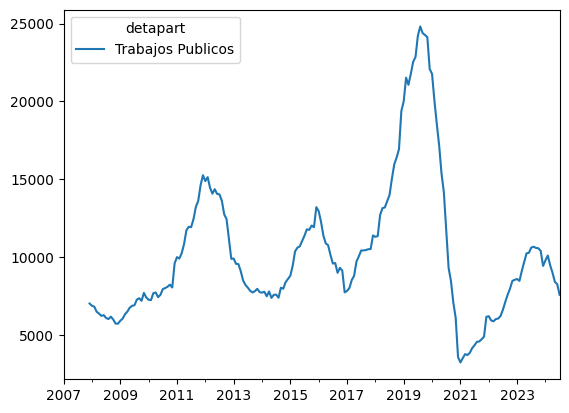

In [20]:
presup_prov[['Trabajos Publicos']].rolling(12).mean().plot()

<Axes: title={'center': 'Evolución acumulada de intereses de la deuda y trabajos públicos'}>

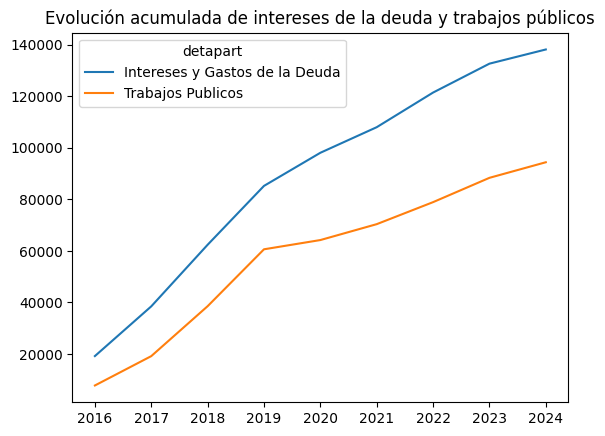

In [21]:
presup_anual[['Intereses y Gastos de la Deuda','Trabajos Publicos']].loc[2016:].cumsum().plot(title= 'Evolución acumulada de intereses de la deuda y trabajos públicos')

In [22]:
presup_anual

detapart,De Origen Provincial,De Origen Nacional,Erogaciones Corrientes,Personal,Intereses y Gastos de la Deuda,Amortizacion de la Deuda Consolidada,Trabajos Publicos,Servicios de Deuda
2007,39971.065833,48774.600000,79807.138333,42660.827500,2676.237500,7730.383333,7021.456667,10406.620833
2008,50355.385833,55751.845000,94902.807500,53151.046667,2458.907500,6752.860833,5727.055833,9211.768333
2009,52348.970000,59490.955833,108967.524167,62027.871667,2651.670000,5879.310000,7410.640000,8530.980000
2010,52019.202500,71022.938333,123039.392500,67571.680000,2504.011667,7073.731667,9594.288333,9577.743333
2011,69337.588333,85856.684167,155585.765833,87607.364167,2640.615000,4113.751667,15262.130000,6754.366667
2012,94596.853333,98955.159167,196312.390000,113521.235833,2636.065833,5523.896667,9889.743333,8159.962500
2013,114204.830833,115759.341667,234798.195833,136675.647500,5207.572500,6607.455833,7755.080000,11815.028333
2014,132910.838333,134996.284167,260269.119167,153123.779167,6465.140000,13553.728333,8603.915833,20018.868333
2015,140967.845833,157982.535000,314504.406667,189115.494167,8302.895000,17154.329167,13210.019167,25457.224167
2016,156240.789167,155821.778333,311334.610833,178093.420000,19154.025833,14381.070833,7740.842500,33535.096667


In [23]:
3387/presup_anual['Erogaciones Corrientes'].iloc[-1]

0.016968956093210807

In [24]:
3387/presup_anual['Personal'].iloc[-1]

0.035711392123873476